# <ins>**Iron Ore Price VS Perth Housing Market**</ins>

## **Link for Datasets**

https://explore.data.abs.gov.au/vis?tm=perth%20house%20prices&pg=0&df[ds]=ECONOMY_TOPICS&df[id]=RPPI&df[ag]=ABS&df[vs]=1.0.0&pd=2008-Q1%2C2021-Q1&dq=2%2B1%2B3.1%2B2%2B3..Q&ly[cl]=REGION&ly[rw]=TIME_PERIOD&ly[rs]=MEASURE&fc=Measure&vw=tb

https://www.kaggle.com/datasets/syuzai/perth-house-prices

https://files.marketindex.com.au/files/workbooks/commodities-workbook.xlsx

https://www.rba.gov.au/statistics/tables/xls/g01hist.xls

## Written Report
## Project Description/Outline: 




The project is about predicting the impact of Iron ore price on Residential 
property price index in Perth from 2008-2021. For this project we will utilize ABS,Reserve Bank of Australia(RBS) and  Kaggle datasets of 
recent years. We will choose to look at the correlation between iron ore 
prices,Established Houses and Number of Unit sold by performing statistical analysis

### Which questions do we want to answer?


1. Is there a correlation between the iron ore price cycle and Perth’s residential property prices?

2. How do the iron price rise and fall impact the Perth residential property price weighted average index?

3. How does the quarterly price vary over the research time period?

4. How does the relation ship between iron ore price rise and fall affect the future of the Perth property market 


## Research Questions to Answer

#### 1. Is there a correlation between the iron ore price cycle and Perth’s residential property prices? ?
 There is no-corelation of iron_ore price with timevalue of property because,the R-squared value is  -0.2, which means no data fit in the model.
** There is no-corelation of iron_ore price and Number of Unit Sold w.r.t time value because,the R-squared value is  -0.3, which means no data fit in the model.

#### 2. How do the iron price rise and fall impact the Perth residential property price weighted average index?

Perth property market price shows relatively stable except COVID period.The number of unit's sold shows a gradual increase with most Quater of the time period, while, Iron ore price is relatively unstable showing the pattern of increase/decrease in most time period. It is also observed that from the lockdown the iron ore price steadily inclined, accelerate over the last quaters of analysis

#### 3.Is this proof of a relationship? What’s next for Australian property market in relationship to iron ore rise/fall?!

No, there is no correlation between 
The results indicate that the iron ore price in fewer quantiles has a positive eﬀect on the housing price in Perth as well. so our analysis prediction coincides with the analysis cited in https://thepropertytribune.com.au/industry/how-much-do-commodity-prices-impact-property-prices/ 
***Source: ABS, SQM Research

Prices on the global commodity markets will certainly have some effect on both our economy, and our property market. Probably with a lag effect. It will take a few quarters of upturn on the one (commodities) to filter through to the property market, and it will also work slowly on the way down.
So, if things turn south in the commodity prices in the future – most commentators believe the current iron ore prices are unsustainable – be aware that this may feed negatively into both our local economy and property markets.
Western Australia, half of whose economy is resources, went through a six-year property downturn after the last mining boom ended.
For now though, it looks like commodities are up, and even if they come off a bit, they could remain relatively high for some time. Time will tell.  

####  How does the quarterly price vary over the research time period?
Relativaly follow the iron ore price with a weighted ratio of -2% to +6% at peaks
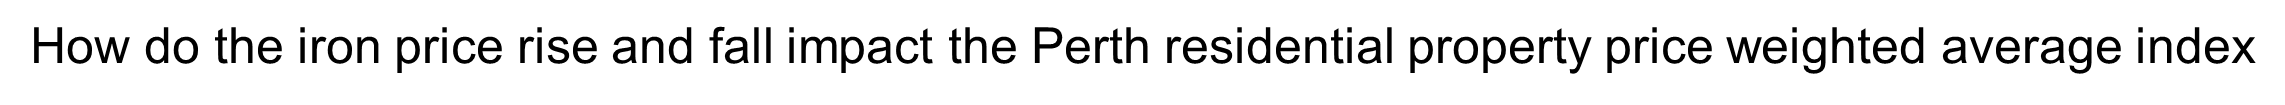
Our API call shows that the Established houses price index have observed clear rise/fall in term of growth. 
Established houses Index Numbers for Q4 of 2018 in Greater Perth: 104
Established houses Index Numbers for Q4 of 2019 in Greater Perth : 101.2
Established houses Index Numbers for Q4 of 2020 Greater Perth: 106.3
Established houses Index Numbers for Q4 of 2021 Greater Perth: 123.8

#  Conclusions:-

There is no-corelation of iron_ore price with timevalue of property because,the R-squared value is -0.2, which means no data fit in the model. ** There is no-corelation of iron_ore price and Number of Unit Sold w.r.t time value because,the R-squared value is -0.3, which means no data fit in the model.

## Data Preparation and cleaning

## First file cleanup process

In [1]:
# Import Dependencies

import gmaps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import json
import requests
import time
from scipy.stats import linregress
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
from pprint import pprint

In [2]:
# Load and Read house Data File, store into Pandas DataFrames
house_data_to_load = "Resources/All residential property data.csv"
house_data = pd.read_csv(house_data_to_load)
house_data.head()

,DATAFLOW,MEASURE: Measure,PROPERTY_TYPE: Property type,REGION: Region,FREQ: Frequency,TIME_PERIOD: Time Period,OBS_VALUE,UNIT_MEASURE: Unit of Measure,OBS_STATUS: Observation Status,OBS_COMMENT: Observation Comment
0,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,3GBRI: Greater Brisbane,Q: Quarterly,2008-Q1,97.5,IN: Index Numbers,NaN,NaN
1,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,3GBRI: Greater Brisbane,Q: Quarterly,2008-Q2,98.9,IN: Index Numbers,NaN,NaN
2,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,3GBRI: Greater Brisbane,Q: Quarterly,2008-Q3,95.5,IN: Index Numbers,NaN,NaN
3,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,3GBRI: Greater Brisbane,Q: Quarterly,2008-Q4,94.3,IN: Index Numbers,NaN,NaN
4,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,3GBRI: Greater Brisbane,Q: Quarterly,2009-Q1,94.2,IN: Index Numbers,NaN,NaN


In [3]:
# Reduce to Required columns 

reduced_columns = house_data[["DATAFLOW","MEASURE: Measure","PROPERTY_TYPE: Property type","REGION: Region","FREQ: Frequency", "TIME_PERIOD: Time Period", "OBS_VALUE" 
                              ]]
reduced_columns.head()


,DATAFLOW,MEASURE: Measure,PROPERTY_TYPE: Property type,REGION: Region,FREQ: Frequency,TIME_PERIOD: Time Period,OBS_VALUE
0,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,3GBRI: Greater Brisbane,Q: Quarterly,2008-Q1,97.5
1,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,3GBRI: Greater Brisbane,Q: Quarterly,2008-Q2,98.9
2,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,3GBRI: Greater Brisbane,Q: Quarterly,2008-Q3,95.5
3,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,3GBRI: Greater Brisbane,Q: Quarterly,2008-Q4,94.3
4,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,3GBRI: Greater Brisbane,Q: Quarterly,2009-Q1,94.2


In [4]:
# Rename the columns
house_data_df = reduced_columns.rename(columns={"MEASURE: Measure": "Unit of Measurement", "PROPERTY_TYPE: Property type": "Property Type",
                                              "REGION: Region": "Region", "FREQ: Frequency": "Frequency",
                                           "TIME_PERIOD: Time Period":"Time Period","OBS_VALUE": "Observation Value"})
house_data_df.head() 

,DATAFLOW,Unit of Measurement,Property Type,Region,Frequency,Time Period,Observation Value
0,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,3GBRI: Greater Brisbane,Q: Quarterly,2008-Q1,97.5
1,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,3GBRI: Greater Brisbane,Q: Quarterly,2008-Q2,98.9
2,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,3GBRI: Greater Brisbane,Q: Quarterly,2008-Q3,95.5
3,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,3GBRI: Greater Brisbane,Q: Quarterly,2008-Q4,94.3
4,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,3GBRI: Greater Brisbane,Q: Quarterly,2009-Q1,94.2


In [5]:
# verify counts with no missing values
house_data_df.count()

DATAFLOW               4293
Unit of Measurement    4293
Property Type          4293
Region                 4293
Frequency              4293
Time Period            4293
Observation Value      4293
dtype: int64

In [6]:
# looking for unique values in region coloumns
house_data_df["Region"].unique()

array(['3GBRI: Greater Brisbane', '2GMEL: Greater Melbourne',
       '6GHOB: Greater Hobart', '5GPER: Greater Perth',
       '4GADE: Greater Adelaide', '7GDAR: Greater Darwin',
       '1GSYD: Greater Sydney', '8ACTE: Australian Capital Territory',
       '100: Weighted average of eight capital cities'], dtype=object)

In [7]:
#Create a new DataFrame that looks into a specifically Perth housedata
Perth_housedata_df = house_data_df.loc[house_data_df["Region"] == "5GPER: Greater Perth"]
Perth_housedata_df.head(3)


,DATAFLOW,Unit of Measurement,Property Type,Region,Frequency,Time Period,Observation Value
212,ABS:RPPI(1.0.0),1: Index Numbers,3: Residential property,5GPER: Greater Perth,Q: Quarterly,2008-Q1,99.5
213,ABS:RPPI(1.0.0),1: Index Numbers,3: Residential property,5GPER: Greater Perth,Q: Quarterly,2008-Q2,97.6
214,ABS:RPPI(1.0.0),1: Index Numbers,3: Residential property,5GPER: Greater Perth,Q: Quarterly,2008-Q3,95.3


In [8]:
# Final clean-up of Perth housedata
Perth_housedata= Perth_housedata_df.replace(
    {"5GPER: Greater Perth": "Greater Perth"})
Perth_housedata

,DATAFLOW,Unit of Measurement,Property Type,Region,Frequency,Time Period,Observation Value
212,ABS:RPPI(1.0.0),1: Index Numbers,3: Residential property,Greater Perth,Q: Quarterly,2008-Q1,99.5
213,ABS:RPPI(1.0.0),1: Index Numbers,3: Residential property,Greater Perth,Q: Quarterly,2008-Q2,97.6
214,ABS:RPPI(1.0.0),1: Index Numbers,3: Residential property,Greater Perth,Q: Quarterly,2008-Q3,95.3
215,ABS:RPPI(1.0.0),1: Index Numbers,3: Residential property,Greater Perth,Q: Quarterly,2008-Q4,92.9
216,ABS:RPPI(1.0.0),1: Index Numbers,3: Residential property,Greater Perth,Q: Quarterly,2009-Q1,92.5
...,...,...,...,...,...,...,...
2486,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,Greater Perth,Q: Quarterly,2020-Q1,92.2
2487,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,Greater Perth,Q: Quarterly,2020-Q2,90.3
2488,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,Greater Perth,Q: Quarterly,2020-Q3,91.5
2489,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,Greater Perth,Q: Quarterly,2020-Q4,93.5


In [9]:
# The Percentage Change from Previous Period of Established houses, Attached dwellings and Residential property.
Housedata_by_Percentage = Perth_housedata.loc[Perth_housedata["Unit of Measurement"] == "2: Percentage Change from Previous Period"]
Housedata_by_Percentage.head()

,DATAFLOW,Unit of Measurement,Property Type,Region,Frequency,Time Period,Observation Value
318,ABS:RPPI(1.0.0),2: Percentage Change from Previous Period,3: Residential property,Greater Perth,Q: Quarterly,2008-Q1,-1.1
319,ABS:RPPI(1.0.0),2: Percentage Change from Previous Period,3: Residential property,Greater Perth,Q: Quarterly,2008-Q2,-1.9
320,ABS:RPPI(1.0.0),2: Percentage Change from Previous Period,3: Residential property,Greater Perth,Q: Quarterly,2008-Q3,-2.4
321,ABS:RPPI(1.0.0),2: Percentage Change from Previous Period,3: Residential property,Greater Perth,Q: Quarterly,2008-Q4,-2.5
322,ABS:RPPI(1.0.0),2: Percentage Change from Previous Period,3: Residential property,Greater Perth,Q: Quarterly,2009-Q1,-0.4


In [10]:
# Just taking the Percentage Change from Previous Period of Established houses
Established_housdata = Housedata_by_Percentage.loc[Housedata_by_Percentage["Property Type"] == "2: Established houses"]
Established_housdata .head()

,DATAFLOW,Unit of Measurement,Property Type,Region,Frequency,Time Period,Observation Value
371,ABS:RPPI(1.0.0),2: Percentage Change from Previous Period,2: Established houses,Greater Perth,Q: Quarterly,2008-Q1,-1.1
372,ABS:RPPI(1.0.0),2: Percentage Change from Previous Period,2: Established houses,Greater Perth,Q: Quarterly,2008-Q2,-2.3
373,ABS:RPPI(1.0.0),2: Percentage Change from Previous Period,2: Established houses,Greater Perth,Q: Quarterly,2008-Q3,-2.2
374,ABS:RPPI(1.0.0),2: Percentage Change from Previous Period,2: Established houses,Greater Perth,Q: Quarterly,2008-Q4,-2.3
375,ABS:RPPI(1.0.0),2: Percentage Change from Previous Period,2: Established houses,Greater Perth,Q: Quarterly,2009-Q1,-0.4


## Second file cleanup Process

In [11]:
#  Load and Read Iron ore and house prices Data File, store into Pandas DataFrames
data_to_load = "Resources1/MASTER_ORE_JOHAN.csv"
data = pd.read_csv(data_to_load )

#clening process
Ironore_and_house_prices=data.dropna(axis ='columns')
Ironore_and_house_prices_df = pd.DataFrame(Ironore_and_house_prices)
Ironore_and_house_prices_df.head()

,Date,Date.1,Q PRICE IO,Q House Sold Value,Q Units Sold,Q1 TimeValue
0,2007M01,2007-Q1,83.14,"$8,263,333",10.33,39083
1,2007M04,2007-Q2,98.83,"$8,529,000",11.33,39173
2,2007M07,2007-Q3,125.54,"$11,707,000",15.67,39264
3,2007M10,2007-Q4,184.44,"$7,729,167",10.33,39356
4,2008M01,2008-Q1,192.20,"$7,273,333",10.00,39448


In [12]:
# Rename the columns

Ironore_and_house_prices_df1 = Ironore_and_house_prices_df.rename(columns={"Date.1": "Time Period", "Q PRICE IO": "Iron Ore Price",
                                              "Q House Sold Value": "House Sold Value", "Q Units Sold": "Units Sold Number",
                                           "Q1 TimeValue":"Time Value"})
Ironore_and_house_prices_df1.head() 

,Date,Time Period,Iron Ore Price,House Sold Value,Units Sold Number,Time Value
0,2007M01,2007-Q1,83.14,"$8,263,333",10.33,39083
1,2007M04,2007-Q2,98.83,"$8,529,000",11.33,39173
2,2007M07,2007-Q3,125.54,"$11,707,000",15.67,39264
3,2007M10,2007-Q4,184.44,"$7,729,167",10.33,39356
4,2008M01,2008-Q1,192.20,"$7,273,333",10.00,39448


##  Merging the data into a single dataset.  

In [13]:
# # Combine the data of Established_houses, Ironore and house_prices into a single dataset, on the basis of "time period"
merging_analysis_df = pd.merge( Established_housdata, Ironore_and_house_prices_df1, how='left', on=["Time Period"])
merging_analysis_df.to_csv("merge_file.csv", index = False)
merging_analysis_df

,DATAFLOW,Unit of Measurement,Property Type,Region,Frequency,Time Period,Observation Value,Date,Iron Ore Price,House Sold Value,Units Sold Number,Time Value
0,ABS:RPPI(1.0.0),2: Percentage Change from Previous Period,2: Established houses,Greater Perth,Q: Quarterly,2008-Q1,-1.1,2008M01,192.20,"$7,273,333",10.00,39448
1,ABS:RPPI(1.0.0),2: Percentage Change from Previous Period,2: Established houses,Greater Perth,Q: Quarterly,2008-Q2,-2.3,2008M04,190.94,"$7,898,333",11.67,39539
2,ABS:RPPI(1.0.0),2: Percentage Change from Previous Period,2: Established houses,Greater Perth,Q: Quarterly,2008-Q3,-2.2,2008M07,166.29,"$7,774,000",12.00,39630
3,ABS:RPPI(1.0.0),2: Percentage Change from Previous Period,2: Established houses,Greater Perth,Q: Quarterly,2008-Q4,-2.3,2008M10,74.53,"$7,333,167",13.33,39722
4,ABS:RPPI(1.0.0),2: Percentage Change from Previous Period,2: Established houses,Greater Perth,Q: Quarterly,2009-Q1,-0.4,2009M01,70.72,"$11,682,833",18.00,39814
5,ABS:RPPI(1.0.0),2: Percentage Change from Previous Period,2: Established houses,Greater Perth,Q: Quarterly,2009-Q2,2.2,2009M04,64.71,"$9,493,333",16.33,39904
6,ABS:RPPI(1.0.0),2: Percentage Change from Previous Period,2: Established houses,Greater Perth,Q: Quarterly,2009-Q3,2.9,2009M07,87.44,"$18,808,333",26.67,39995
7,ABS:RPPI(1.0.0),2: Percentage Change from Previous Period,2: Established houses,Greater Perth,Q: Quarterly,2009-Q4,5.8,2009M10,97.04,"$13,007,000",19.67,40087
8,ABS:RPPI(1.0.0),2: Percentage Change from Previous Period,2: Established houses,Greater Perth,Q: Quarterly,2010-Q1,3.3,2010M01,130.97,"$17,275,000",24.00,40179
9,ABS:RPPI(1.0.0),2: Percentage Change from Previous Period,2: Established houses,Greater Perth,Q: Quarterly,2010-Q2,-0.2,2010M04,159.15,"$15,902,064",22.67,40269


# Analysis Process

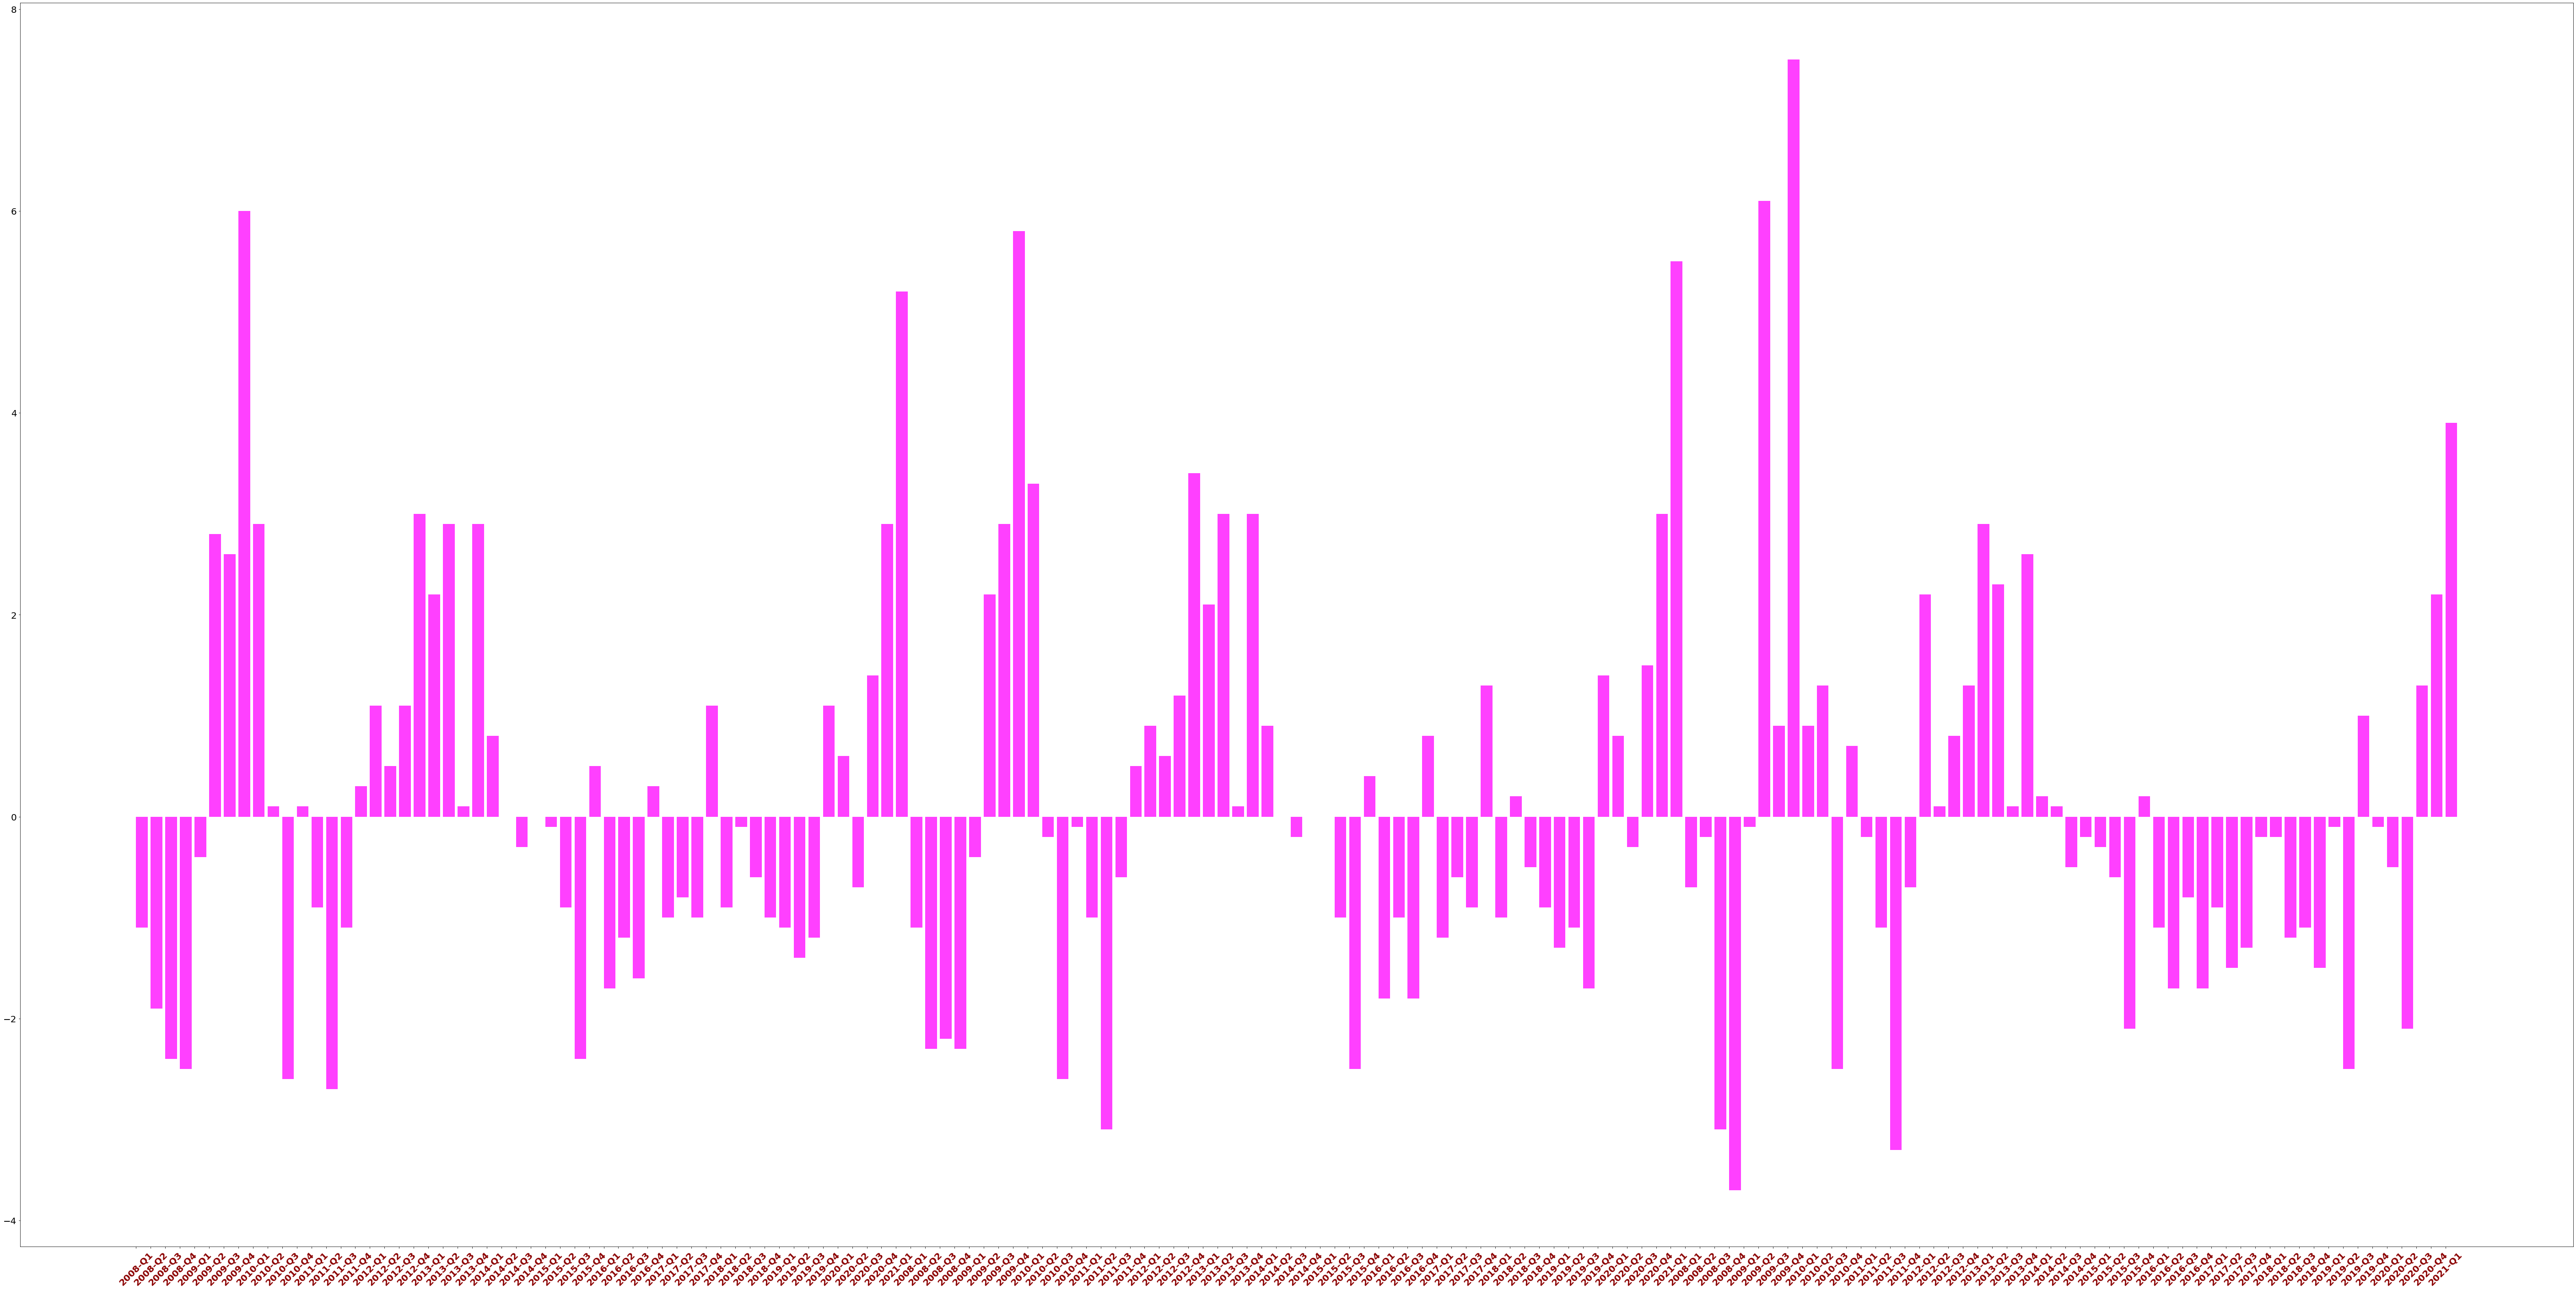

<Figure size 432x288 with 0 Axes>

In [14]:
# The bar graph of Percentage Change from Previous Period of Established houses, Attached dwellings and Residential property.
x_axis = np.arange(len(Housedata_by_Percentage))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(100,50))
plt.bar(x_axis, Housedata_by_Percentage["Observation Value"], color='magenta', alpha=0.75, align="edge")
plt.xticks(tick_locations, Housedata_by_Percentage["Time Period"], rotation="45",color="darkred",fontsize=20, fontweight= 'bold')
plt.show()
plt.tight_layout()


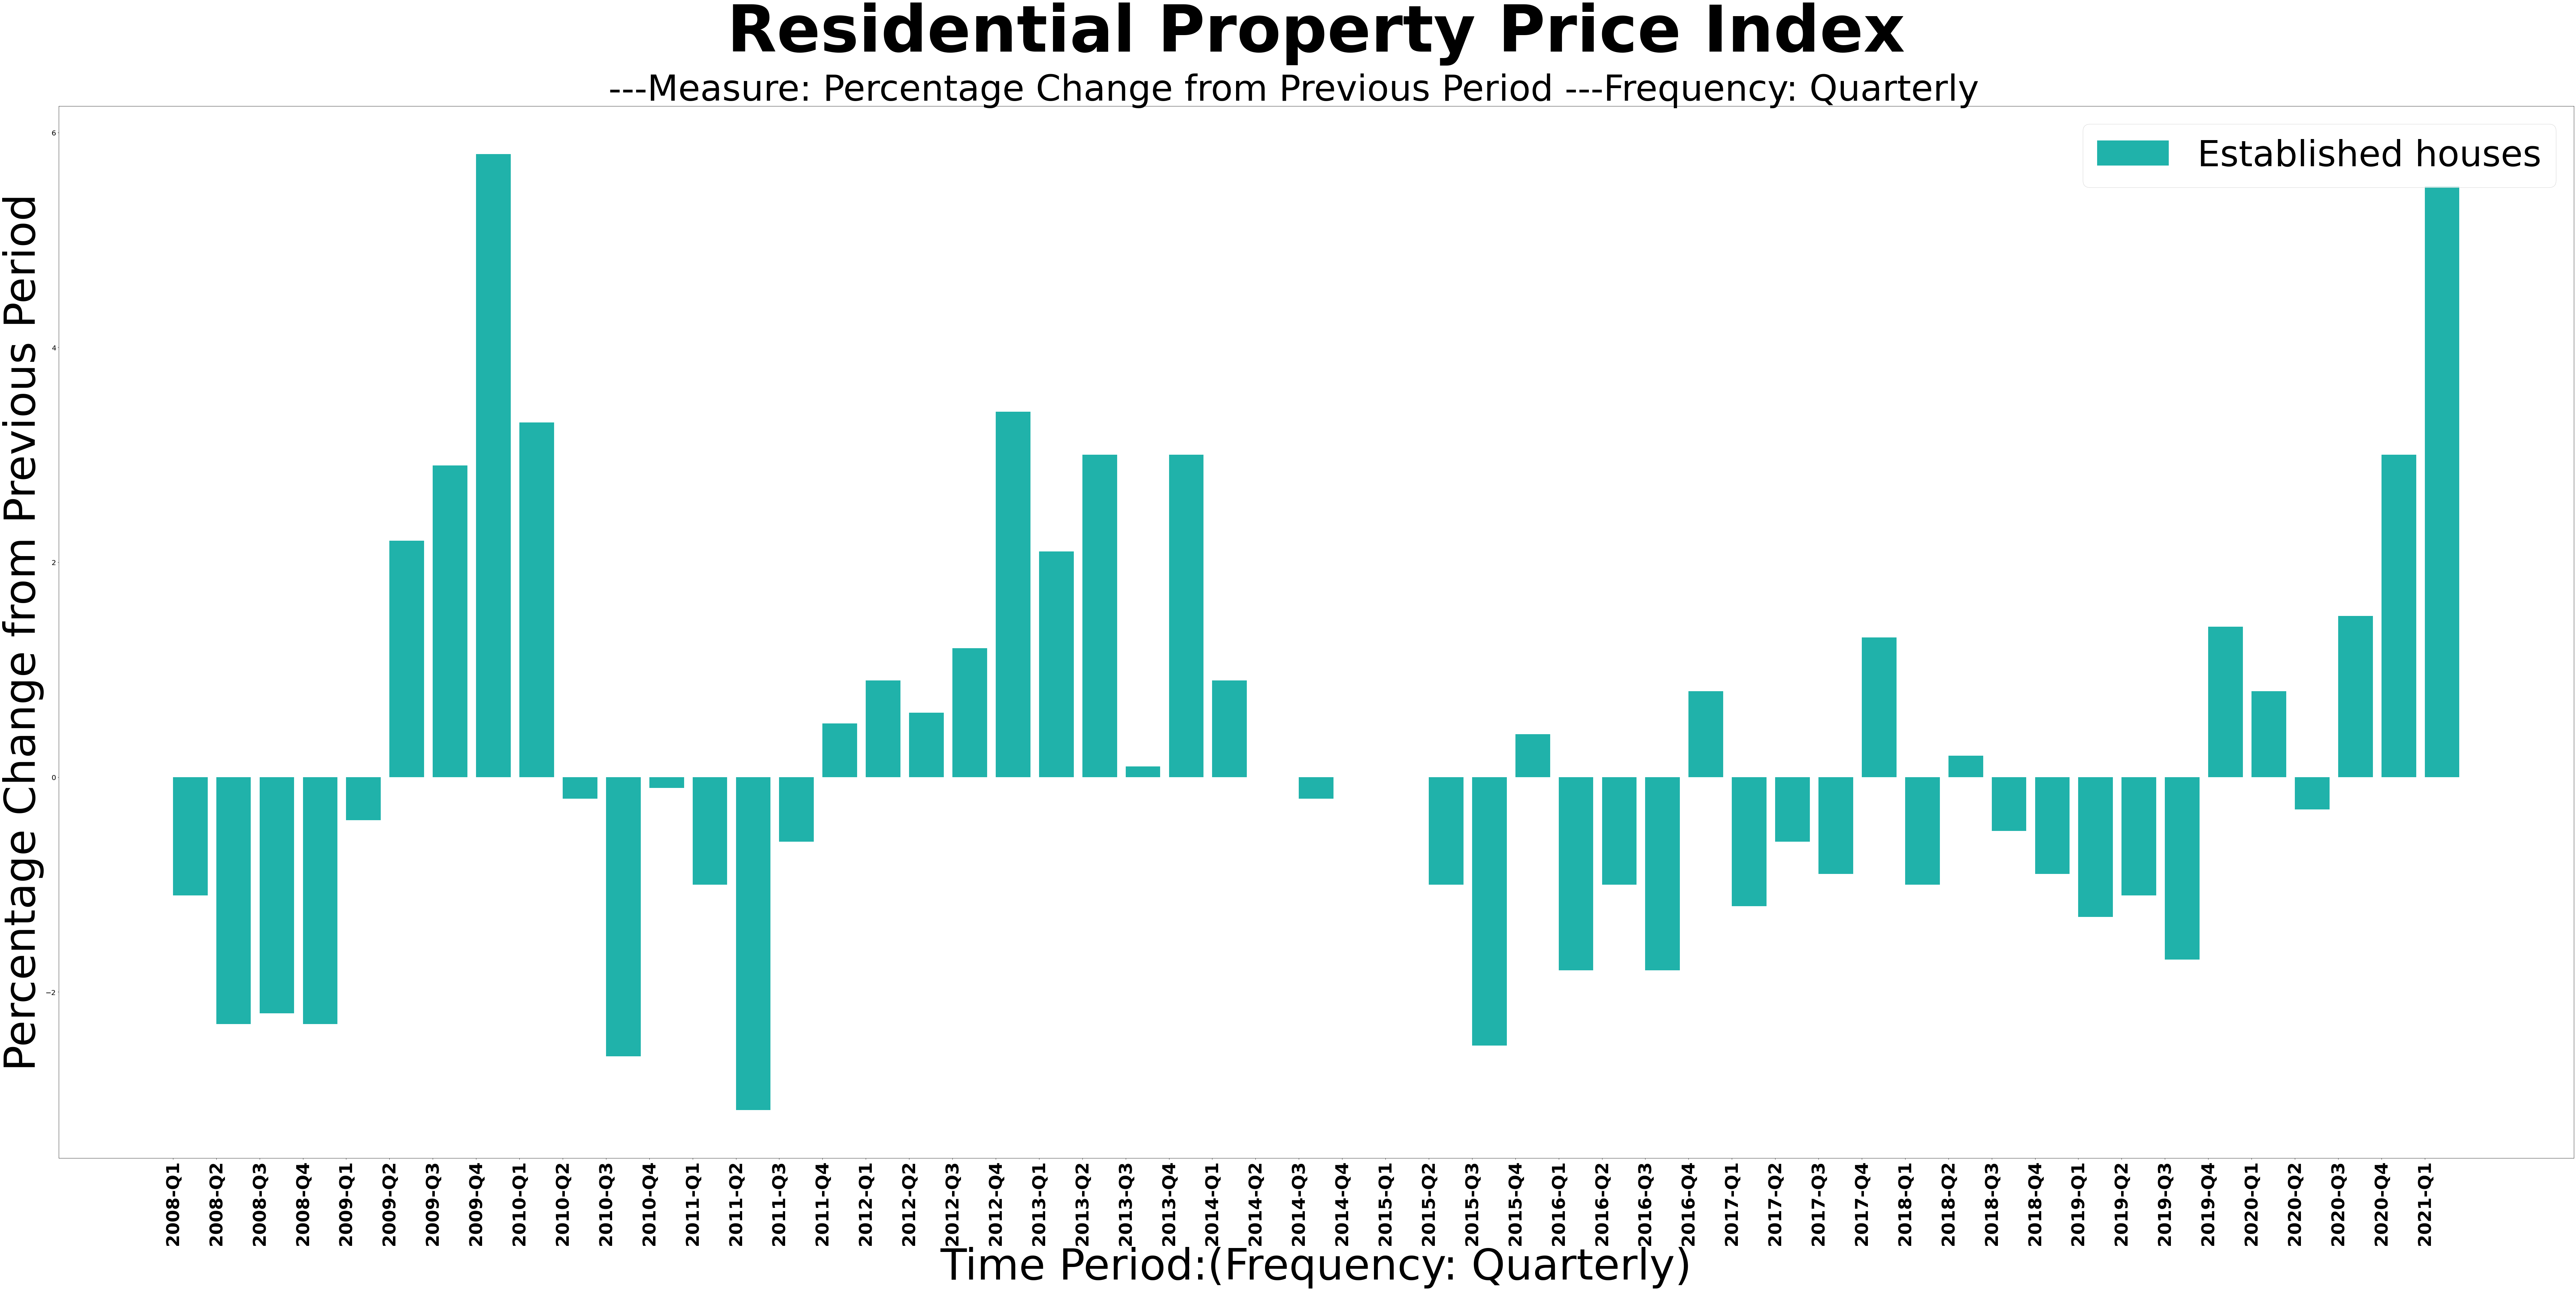

In [15]:
# The bar graph of Percentage Change from Previous Period of Established houses
x_axis = np.arange(len(Established_housdata))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(100,50))

plt.bar(x_axis, Established_housdata["Observation Value"], color='lightseagreen', alpha=1, align="edge",label="Established houses")
plt.xticks(tick_locations,Established_housdata["Time Period"], rotation="vertical",color="black",fontsize=50, fontweight= 'bold')
plt.title("Residential Property Price Index",fontsize=180,y=1.05, fontweight= 'bold')

sub_title1 = " ---Measure: Percentage Change from Previous Period ---Frequency: Quarterly"


plt.suptitle(sub_title1 ,y=0.945,  fontsize=100)

plt.xlabel('Time Period:(Frequency: Quarterly)',fontsize=120)
plt.ylabel('Percentage Change from Previous Period', fontsize=120)


plt.legend(loc=1,fontsize=100)
plt.tight_layout()
plt.savefig("Images/Established_housprice.png")
plt.show()




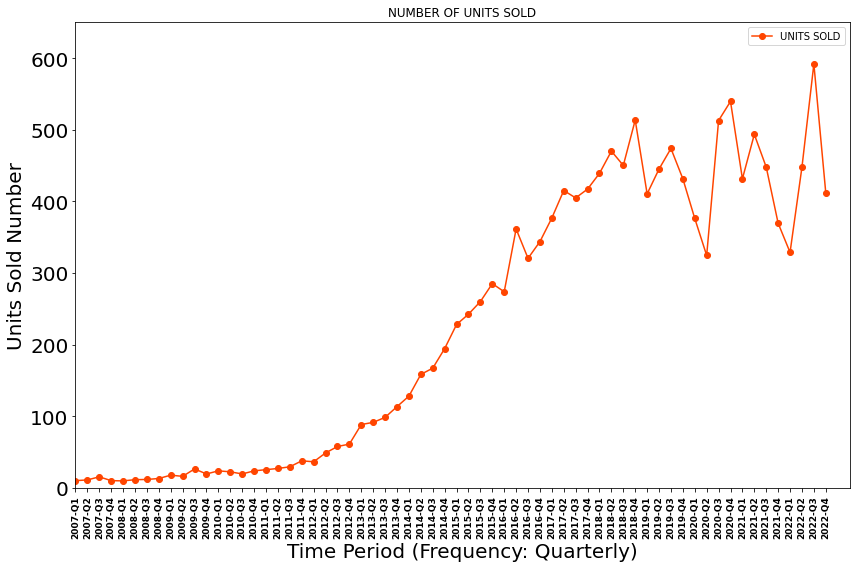

In [16]:
# Plot the line chart of house_pricee w.r.t to time Period

x_axis =Ironore_and_house_prices_df1["Time Period"]
y_axis=Ironore_and_house_prices_df1["Units Sold Number"]
plt.figure(figsize=(12,8))
house_prices, = plt.plot(x_axis, y_axis, color="orangered",marker='o', label="UNITS SOLD")
plt.title("NUMBER OF UNITS SOLD")
plt.xlabel('Time Period (Frequency: Quarterly)',fontsize=20)
plt.ylabel('Units Sold Number', fontsize=20)
plt.legend(loc="best",fontsize=10)

plt.xlim(0,65)
plt.ylim(0,650)


tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,Ironore_and_house_prices_df1["Time Period"], rotation="vertical",color="black",fontsize=9, fontweight= 'bold')


plt.tight_layout()
plt.savefig("Images/Unisold.png")
plt.show()


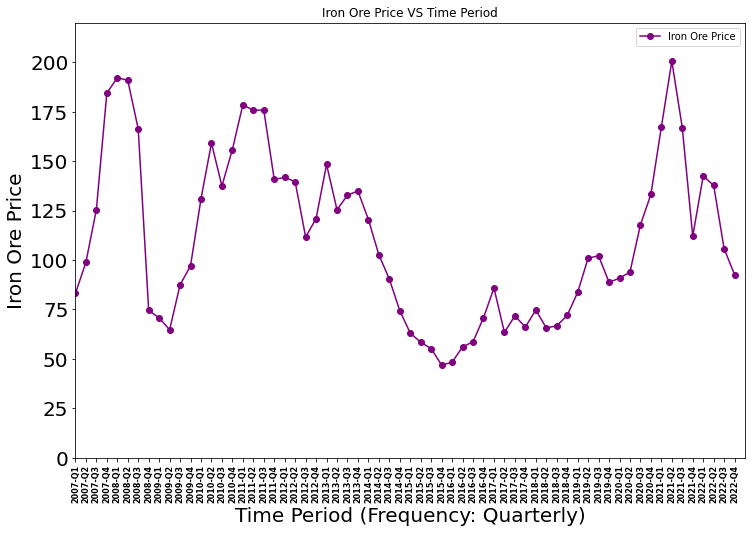

In [17]:
# Plot the line chart of Iron Ore Price w.r.t to time Period

x_axis =Ironore_and_house_prices_df1["Time Period"]
y_axis=Ironore_and_house_prices_df1["Iron Ore Price"]
plt.figure(figsize=(12,8))
house_prices, = plt.plot(x_axis, y_axis, color="purple",marker='o', label="Iron Ore Price")
plt.title("Iron Ore Price VS Time Period")
plt.xlabel('Time Period (Frequency: Quarterly)',fontsize=20)
plt.ylabel('Iron Ore Price', fontsize=20)
plt.legend(loc="best")
plt.xlim(0,64)
plt.ylim(0,220)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,Ironore_and_house_prices_df1["Time Period"], rotation="vertical",color="black",fontsize=8, fontweight= 'bold')
plt.savefig("Images/Iron Ore Price")
plt.show()


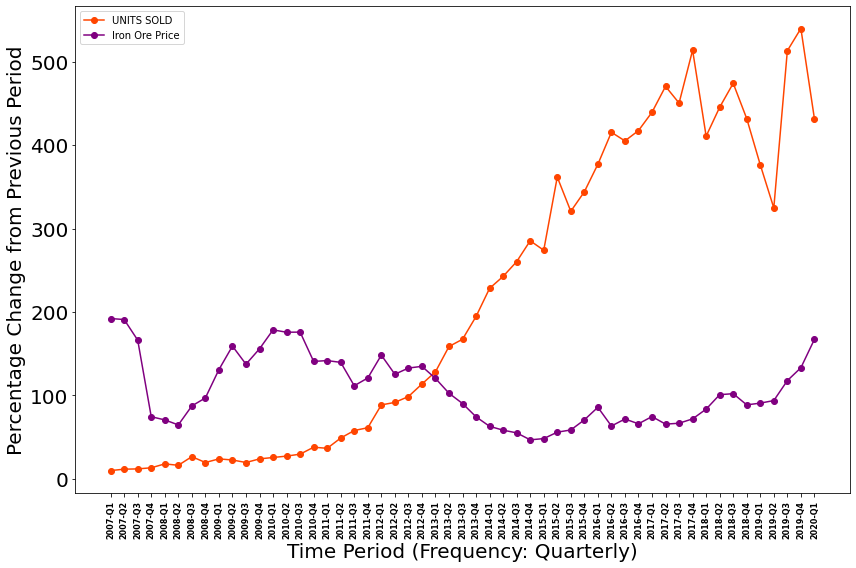

In [18]:
x_axis =merging_analysis_df["Time Period"]
x1_axis = np.arange(len(merging_analysis_df))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(12,8))
y_axis=merging_analysis_df["Units Sold Number"]
y1_axis=merging_analysis_df["Iron Ore Price"]

# plt.xticks(tick_locations,merging_analysis_df["Time Period"], rotation="45",color="darkred",fontsize=55, fontweight= 'bold')
plt.plot(x_axis,y_axis,color="orangered",marker='o', label="UNITS SOLD")
plt.plot(x_axis,y1_axis,color="purple",marker='o', label="Iron Ore Price")
plt.legend(loc="best")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,Ironore_and_house_prices_df1["Time Period"], rotation="vertical",color="black",fontsize=8, fontweight= 'bold')
plt.xlabel('Time Period (Frequency: Quarterly)',fontsize=20)
plt.ylabel('Percentage Change from Previous Period', fontsize=20)
plt.tight_layout()
plt.show()

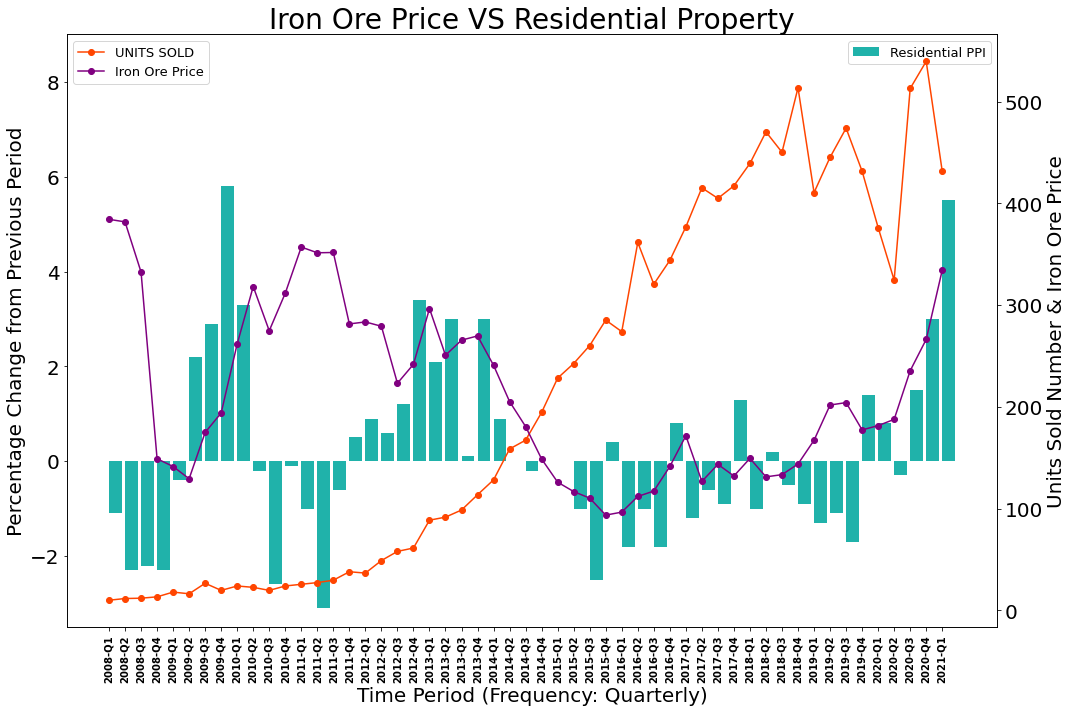

In [19]:
x =merging_analysis_df["Time Period"]
x1 = np.arange(len(merging_analysis_df))
#tick_locations = [value for value in x1]
# plt.figure(figsize=(12,6))
y=merging_analysis_df["Units Sold Number"]
y1=merging_analysis_df["Iron Ore Price"]*2
y2=Established_housdata["Observation Value"]


fig, ax = plt.subplots(figsize=(15,10))
plt.xticks(x1,merging_analysis_df["Time Period"], rotation="90",color="black",fontsize=10, fontweight= 'bold')
ax2 = ax.twinx()

ax.set_ylim([-3.5, 9])
w=ax.bar(x1,Established_housdata["Observation Value"],color='lightseagreen', align="edge",label="Residential PPI")
y=ax2.plot(x,y,color="orangered",marker='o', label="UNITS SOLD")
z=Iron_ore_price,=ax2.plot(x,y1,color="purple",marker='o', label="Iron Ore Price")


# plt.legend( loc="best",fontsize=20)
plt.title("Iron Ore Price VS Residential Property", fontsize=28)
plt.xlabel("Time Period")
# plt.ylabel("Housing Index")
ax.legend(loc=1,fontsize=13)
ax2.legend(loc=0,fontsize=13)

ax.set_xlabel('Time Period (Frequency: Quarterly)',fontsize=20)
ax.set_ylabel('Percentage Change from Previous Period', fontsize=20)
ax2.set_ylabel('Units Sold Number & Iron Ore Price', fontsize=20)

plt.savefig("Images\Iron Ore Price VS Residential Property.png")
plt.tight_layout()
plt.show()

In [20]:
#load House price and iron ore price file 
data_to_load = "Resources1/MASTER_ORE_JOHAN.csv"
data = pd.read_csv(data_to_load )

#clening process
NEWDATA=data.dropna(axis ='columns')
NEWDATA_df = pd.DataFrame(NEWDATA)
NEWDATA_df.to_csv("MASTER_ORE_JOHAN_TEST.csv", index = False)
NEWDATA_df.head()

,Date,Date.1,Q PRICE IO,Q House Sold Value,Q Units Sold,Q1 TimeValue
0,2007M01,2007-Q1,83.14,"$8,263,333",10.33,39083
1,2007M04,2007-Q2,98.83,"$8,529,000",11.33,39173
2,2007M07,2007-Q3,125.54,"$11,707,000",15.67,39264
3,2007M10,2007-Q4,184.44,"$7,729,167",10.33,39356
4,2008M01,2008-Q1,192.20,"$7,273,333",10.00,39448


## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    
    plt.grid()

   
    
   

In [22]:
data = NEWDATA_df[['Date.1','Q Units Sold']]
correlation = data.corr(method='pearson')
correlation 

,Q Units Sold
Q Units Sold,1.0


## Iron Ore VS TimeValue Regression

The r-square is -0.22845931959533292
y = -0.01x + 346.59


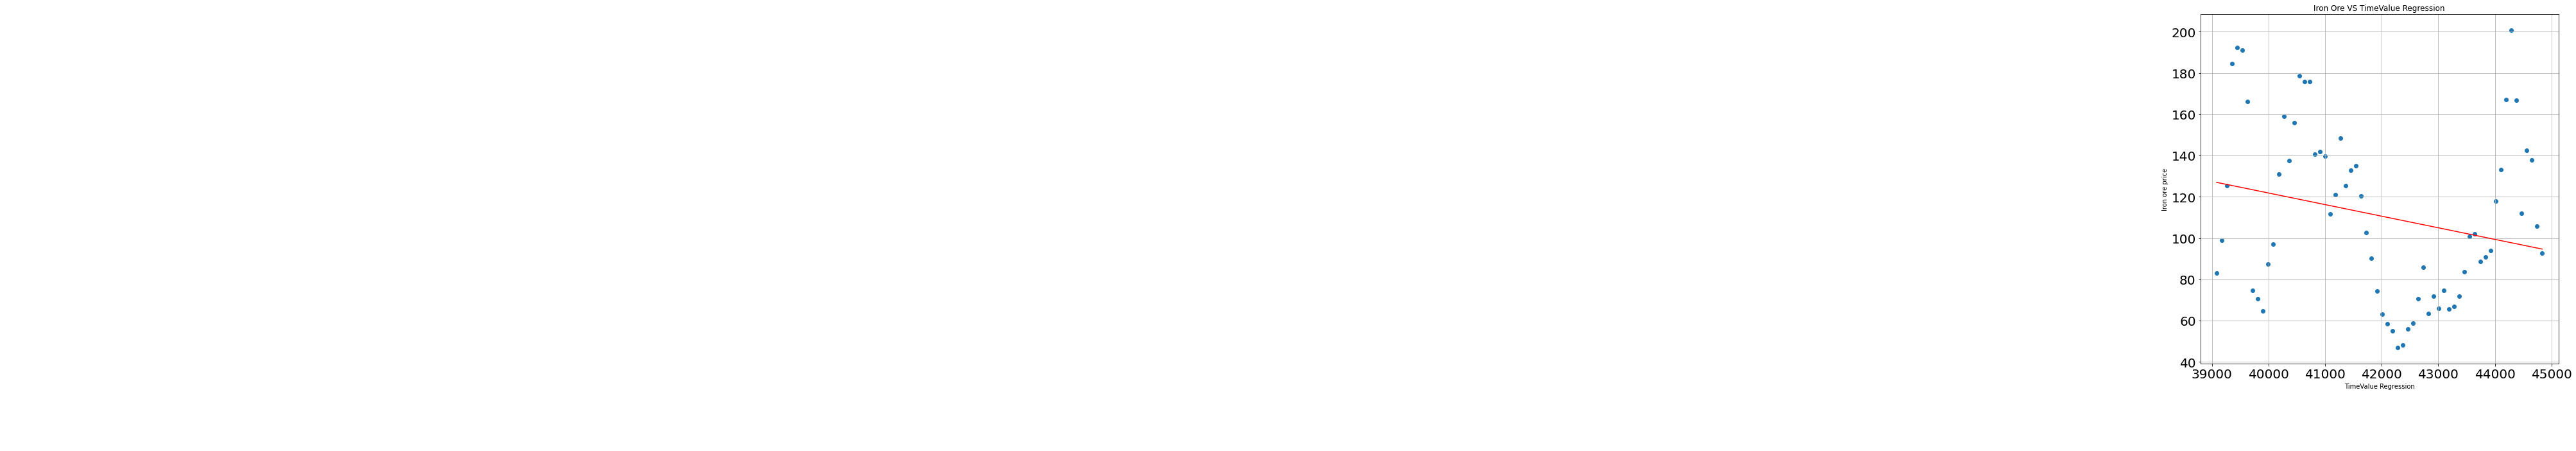

In [23]:
#set the data sets to compare
x_values = NEWDATA_df["Q1 TimeValue"]
y_values = NEWDATA_df["Q PRICE IO"]
fig = plt.figure(figsize=(10,10))
regEQplotX = 0
regEQplotY = 0
#label the y axis
y_label = "ORE PRICE"
#give the title
plt.title(f'Iron Ore VS TimeValue Regression')
plt.xlabel("TimeValue Regression")
plt.ylabel("Iron ore price")
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'Iron Ore Price VS unit sold.png')
plt.show()

## Iron Ore Price VS unit sold

The r-square is -0.3443259245919312
y = -0.08x + 127.92


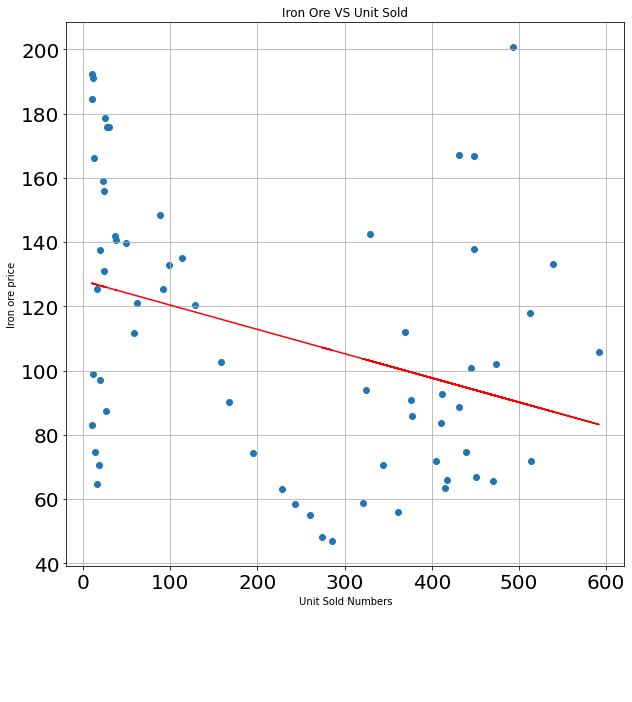

In [24]:
#set the data sets to compare
x_values = NEWDATA_df["Q Units Sold"]
y_values = NEWDATA_df["Q PRICE IO"]
fig = plt.figure(figsize=(10,10))
regEQplotX = 0
regEQplotY = 0
#label the y axis
y_label = "ORE PRICE"
#give the title
plt.title(f'Iron Ore VS Unit Sold')
plt.xlabel("Unit Sold Numbers")
plt.ylabel("Iron ore price")
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'Iron Ore Price VS unit sold.png')
plt.show()

## House Sold vs TimeValue Regression

The r-square is 0.9342005032512742
y = 0.1x + -4167.35


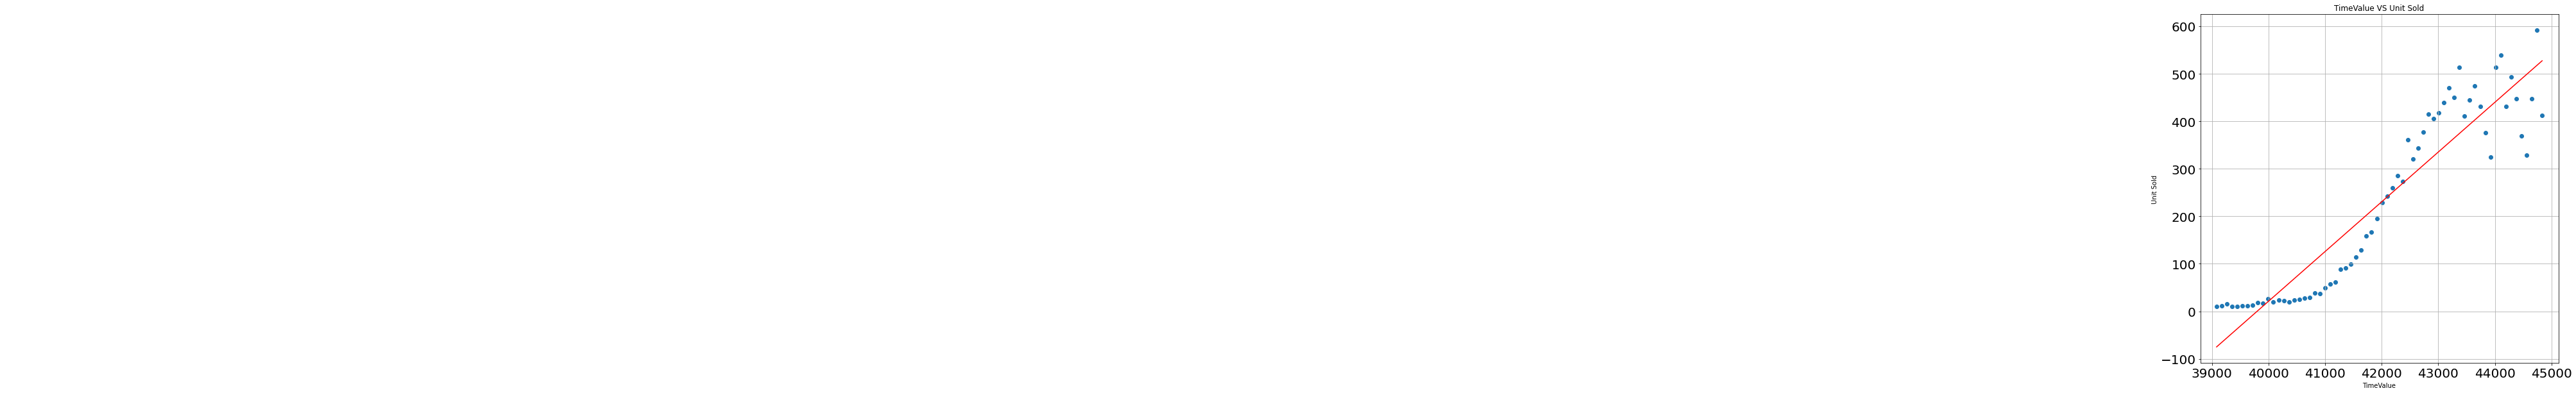

In [25]:
#set the data sets to compare
x_values = NEWDATA_df["Q1 TimeValue"]
y_values = NEWDATA_df["Q Units Sold"]
fig = plt.figure(figsize=(10,10))
regEQplotX = 0
regEQplotY = 0
#label the y axis
y_label = "UNITS SOLD"
#give the title
plt.title(f'TimeValue VS Unit Sold')
plt.xlabel("TimeValue")
plt.ylabel("Unit Sold")
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'House Sold vs TIME Regression.png')
plt.show()

## our conclusions, including a numerical summary and visualisations of the summary

There is no-correlation of iron_ore price and Number of Unit Sold w.r.t time value because,the R-squared value is -0.3, which means no data fit in the model.

The results show an apparent correlation between iron ore price (purple line)  and housing price index (green bar), however it also shows and inverse for the number of units sold (orange)

The reviewed data points to an increase of first home owner grants increasing in 2008 with the commencement of a rates easing cycle by the RBA in 2011 that coincide with a slowdown in housing stock in 2012.

Anectdotally…The correlation is not exact as the average household debt starts increasing in 2014 and the trend is still growing, this may be related to the increase in housing stock turnover regardless of the iron ore price


## Use at least one API—if you can find one with data pertinent to your primary research questions.

In [36]:
url1 = "https://api.data.abs.gov.au/data/ABS,RPPI,1.0.0/1.2.5GPER+100.Q?startPeriod=2018-Q4&endPeriod=2021-Q4&dimensionAtObservation=AllDimensions&format=jsondata"
# api_format = "json"

In [37]:
# https://api.data.abs.gov.au/data/jv/all?startPeriod=2020&format=jsondata

In [38]:
response = requests.get(url1)
print(response.url)

https://api.data.abs.gov.au/data/ABS,RPPI,1.0.0/1.2.5GPER+100.Q?startPeriod=2018-Q4&endPeriod=2021-Q4&dimensionAtObservation=AllDimensions&format=jsondata


In [39]:
# Storing the JSON response within a variable
data = response.json()
# Use json.dumps to print the json
print(json.dumps(data, indent=4, sort_keys=True))

{
    "data": {
        "dataSets": [
            {
                "action": "Information",
                "annotations": [
                    0,
                    1,
                    2,
                    3,
                    4,
                    5,
                    6
                ],
                "links": [
                    {
                        "rel": "DataStructure",
                        "urn": "urn:sdmx:org.sdmx.infomodel.datastructure.DataStructure=ABS:RPPI(1.0.0)"
                    }
                ],
                "observations": {
                    "0:0:0:0:0": [
                        104,
                        0,
                        null,
                        null
                    ],
                    "0:0:0:0:1": [
                        102.6,
                        0,
                        null,
                        null
                    ],
                    "0:0:0:0:10": [
                        117.7,
   

In [40]:
b=data["data"]["dataSets"][0][  "observations"][  "0:0:0:0:0"][0]
b

104

In [41]:
c=data["data"]["dataSets"][0][  "observations"]["0:0:0:0:4"][0]
c

101.2

In [42]:
d=data["data"]["dataSets"][0][  "observations"]["0:0:0:0:8"][0]
d

106.3

In [43]:
e=data["data"]["dataSets"][0][  "observations"][ "0:0:0:0:12"][0]
e

123.8

In [44]:
a=data["data"][ "structure"]["dimensions"][ "observation"][0]['values'][0][ 'name']


In [45]:
print(f"Established houses {a} for Q4 of 2018 in Greater Perth: {b}")
print(f"Established houses {a} for Q4 of 2019 in Greater Perth : {c}")
print(f"Established houses {a} for Q4 of 2020 Greater Perth: {d}")
print(f"Established houses {a} for Q4 of 2021 Greater Perth: {e}")


Established houses Index Numbers for Q4 of 2018 in Greater Perth: 104
Established houses Index Numbers for Q4 of 2019 in Greater Perth : 101.2
Established houses Index Numbers for Q4 of 2020 Greater Perth: 106.3
Established houses Index Numbers for Q4 of 2021 Greater Perth: 123.8


## The implications of your findings: what do your findings mean


Prices on the global commodity markets will certainly have some effect on both our economy, and our property market. Probably with a lag effect. It will take a few quarters of upturn on the one (commodities) to filter through to the property market, and it will also work slowly on the way down. So, if things turn south in the commodity prices in the future – most commentators believe the current iron ore prices are unsustainable – be aware that this may feed negatively into both our local economy and property markets. Western Australia, half of whose economy is resources, went through a six-year property downturn after the last mining boom ended. For now though, it looks like commodities are up, and even if they come off a bit, they could remain relatively high for some time. Time will tell.